##### Section of LDA analysis and word2vec model



### Importing libraries
Python imports:

In [1]:
#!pip install spacy
import spacy
import string
import re
import itertools
import csv
import shutil
import matplotlib.pyplot as plt
import zipfile
import lzma
import json
import requests
import os
import xml.etree.cElementTree as ET
import pandas as pd
import numpy as np
import seaborn as sns
import random
from nltk.corpus import stopwords 

#!pip install -U spacy unidecode

from unidecode import unidecode
from spacy.matcher import Matcher 
from spacy import displacy 
from IPython.display import Image, display
import nltk
nltk.download('wordnet')
nltk.download('words')
nltk.download('punkt')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.util import skipgrams
from nltk.corpus import wordnet as wn
from spacy.lang.en import English

from tqdm import tqdm
from ipywidgets import FloatProgress
%matplotlib inline


#!pip install pyquery
#!pip install -U gensim

import gensim
#import pyLDAvis.gensim
import pyLDAvis.gensim
import pickle
from gensim import corpora
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import strip_non_alphanum
from gensim.models import CoherenceModel

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## LDA

Performing Topic Model
Topic model is an unsupervised machine learning method that helps discover hidden semantic structures in a paper, that allows to learn topic representations of papers in a corpus.

The model can be applied to any kinds of labels on documents, such as tags on posts on the website.

Here I use Latent Dirichlet Allocation (LDA), one of the most popular topic modeling methods: is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar.

In [35]:
#Load lemmatization 2 data
with open("data_lemmatized_2.pkl", 'rb') as f:
     data_lemmatized_2 = pickle.load(f)

In [ ]:
id2word2 = corpora.Dictionary(data_lemmatized_2)

In [ ]:
#Term Document Frequency
texts = data_lemmatized_2
corpus2 = [id2word2.doc2bow(text) for text in texts]

In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word2[id], freq) for id, freq in cp] for cp in corpus2[:1]]

In [ ]:
id2word2.save('dictionary2.gensim')

In [ ]:
with open("corpus2.pkl", "wb") as f:
    pickle.dump(corpus2, f)

### Save and load model

LDA model can be saved and loaded locally: doing so can reduce time to train model again.

Alpha and eta are hyperparameters that affect sparsity of the topics. According to the Gensim docs, both defaults to 1.0/num_topics prior.

Chunksize is the number of documents to be used in each training chunk. update_every determines how often the model parameters should be updated and passes is the total number of training passes.

In [ ]:
id2word2.load('dictionary2.gensim')

In [ ]:
id2word2_skip.load('id2word2_skip.gensim')

In [ ]:
with open('corpus2.pkl', 'rb') as f:
    corpus2 = pickle.load(f)

In [ ]:
#For each of the chosen 10 topic, we will explore the words occuring in that topic and their relative weights
ldamodel2 = gensim.models.ldamodel.LdaModel(corpus=corpus2,
                                           id2word=id2word2,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
#MODEL OF INTEREST
ldamodel3 = gensim.models.ldamodel.LdaModel(corpus=corpus2,
                                           id2word=id2word2,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
ldamodel4 = gensim.models.ldamodel.LdaModel(corpus=corpus2,
                                           id2word=id2word2,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
ldamodel5 = gensim.models.ldamodel.LdaModel(corpus=corpus2,
                                           id2word=id2word2,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
ldamodel2.save('model2.gensim')

In [ ]:
ldamodel3.save('model3.gensim')

In [ ]:
ldamodel4.save('model4.gensim')

In [ ]:
ldamodel5.save('model5.gensim')

pyLDAvis is designed to help users interpret the topics in a topic model that has been fit to a corpus of text data.

The package extracts information from a fitted LDA topic model to inform an interactive web-based visualization.

Saliency: a measure of how much the term tells you about the topic.

Relevance: a weighted average of the probability of the word given the topic and the word given the topic normalized by the probability of the topic.

The size of the bubble measures the importance of the topics, relative to the data

In [7]:
#LOAD MODEL 2 AND CORPUS 
id2word2 = gensim.corpora.Dictionary.load('dictionary2.gensim')
with open('corpus2.pkl', 'rb') as f:
    corpus2 = pickle.load(f)
ldamodel2 = gensim.models.ldamodel.LdaModel.load('model2.gensim')

In [9]:
#LOAD MODEL 3 AND CORPUS 
id2word2 = gensim.corpora.Dictionary.load('dictionary2.gensim')
with open('corpus2.pkl', 'rb') as f:
    corpus2 = pickle.load(f)
ldamodel3 = gensim.models.ldamodel.LdaModel.load('model3.gensim')

In [10]:
#LOAD MODEL 4 AND CORPUS 
id2word2 = gensim.corpora.Dictionary.load('dictionary2.gensim')
with open('corpus2.pkl', 'rb') as f:
    corpus2 = pickle.load(f)
ldamodel4 = gensim.models.ldamodel.LdaModel.load('model4.gensim')

In [11]:
#LOAD MODEL 5 AND CORPUS 
id2word2 = gensim.corpora.Dictionary.load('dictionary2.gensim')
with open('corpus2.pkl', 'rb') as f:
    corpus2 = pickle.load(f)
ldamodel5 = gensim.models.ldamodel.LdaModel.load('model5.gensim')

A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant

In [16]:
pyLDAvis.enable_notebook()
vis2 = pyLDAvis.gensim.prepare(ldamodel2, corpus2, id2word2)
vis2

C:\Users\USER\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.033917 -0.135217       1        1  13.503048
3     -0.106489  0.127238       2        1  10.741042
13    -0.144325  0.003409       3        1   8.322145
12    -0.160815 -0.138778       4        1   8.287615
2      0.192431 -0.166967       5        1   8.271738
8     -0.182266  0.025796       6        1   7.955017
6      0.111278  0.148007       7        1   7.579458
1     -0.063658 -0.260698       8        1   7.316079
0     -0.004957 -0.155939       9        1   6.132619
4     -0.068972  0.053134      10        1   4.479841
14     0.086819  0.141603      11        1   4.256780
11    -0.084547  0.098162      12        1   3.901456
9      0.176703 -0.022434      13        1   3.239152
5      0.303679  0.071441      14        1   3.072510
7     -0.088797  0.211242      15        1   2.941500, topic_info=              Term          Freq         Total Category  logprob  loglift
205          trial  1.229220e+06  1.229220e+06  Default  30.0000  30.0000
384           jury  4.484850e+05  4.484850e+05  Default  29.0000  29.0000
181        section  4.760730e+05  4.760730e+05  Default  28.0000  28.0000
431         people  4.698600e+05  4.698600e+05  Default  27.0000  27.0000
76        evidence  9.295150e+05  9.295150e+05  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
1108    negligence  1.335076e+04  1.284174e+05  Topic15  -4.7882   1.2625
428          party  1.273114e+04  1.894251e+05  Topic15  -4.8357   0.8263
283   construction  1.162251e+04  1.178564e+05  Topic15  -4.9268   1.2097
1109     negligent  9.938490e+03  5.386826e+04  Topic15  -5.0834   1.8361
2              act  1.031557e+04  3.066119e+05  Topic15  -5.0461   0.1343

[1063 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
3357     14  0.999292  abduction
223       1  0.231207      abuse
223       4  0.141357      abuse
223       8  0.198603      abuse
223       9  0.383923      abuse
...     ...       ...        ...
641      10  0.110338       year
641      11  0.014986       year
641      12  0.145815       year
641      13  0.036798       year
5673     11  0.999916     zoning

[2734 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 4, 14, 13, 3, 9, 7, 2, 1, 5, 15, 12, 10, 6, 8])

In [17]:
#MODEL OF INTEREST
pyLDAvis.enable_notebook()
vis3 = pyLDAvis.gensim.prepare(ldamodel3, corpus2, id2word2)
vis3

C:\Users\USER\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.114916  0.034351       1        1  12.482921
12    -0.002289  0.196103       2        1   9.838567
13    -0.167744 -0.033399       3        1   9.290783
8     -0.088233  0.106157       4        1   8.669205
1      0.114241  0.230242       5        1   5.969382
2      0.240753  0.095087       6        1   5.394931
5      0.167082 -0.160571       7        1   5.371066
4     -0.191095  0.038283       8        1   5.277490
19    -0.025256  0.055649       9        1   4.768559
11     0.073311  0.059127      10        1   4.344087
16     0.054278 -0.235925      11        1   4.138031
6     -0.041605 -0.224933      12        1   3.697009
0      0.145541  0.121410      13        1   3.439994
14    -0.041763 -0.167948      14        1   3.350470
17    -0.074245 -0.071127      15        1   2.871569
9      0.113606 -0.012521      16        1   2.809761
3     -0.226900  0.029073      17        1   2.429138
15    -0.156064  0.038593      18        1   2.216460
18     0.155005 -0.144911      19        1   1.925091
7     -0.163539  0.047259      20        1   1.715485, topic_info=                Term          Freq         Total Category  logprob  loglift
205            trial  1.282685e+06  1.282685e+06  Default  30.0000  30.0000
3623               d  4.214870e+05  4.214870e+05  Default  29.0000  29.0000
233        agreement  2.944020e+05  2.944020e+05  Default  28.0000  28.0000
287         contract  2.618480e+05  2.618480e+05  Default  27.0000  27.0000
384             jury  4.594810e+05  4.594810e+05  Default  26.0000  26.0000
...              ...           ...           ...      ...      ...      ...
112           injury  9.331635e+03  1.564806e+05  Topic20  -4.6072   1.2460
923   interpretation  5.747173e+03  4.343149e+04  Topic20  -5.0919   2.0430
1042         defense  6.429397e+03  1.942973e+05  Topic20  -4.9797   0.6570
295           damage  6.327602e+03  1.807607e+05  Topic20  -4.9956   0.7132
116            issue  6.556167e+03  2.888797e+05  Topic20  -4.9602   0.2799

[1374 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
3357     10  0.998347  abduction
223       1  0.295230      abuse
223       2  0.136573      abuse
223       5  0.180845      abuse
223       7  0.028904      abuse
...     ...       ...        ...
641      14  0.006242       year
641      15  0.039931       year
641      16  0.018427       year
641      17  0.246247       year
641      18  0.051034       year

[4132 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 13, 14, 9, 2, 3, 6, 5, 20, 12, 17, 7, 1, 15, 18, 10, 4, 16, 19, 8])

In [18]:
pyLDAvis.enable_notebook()
vis4 = pyLDAvis.gensim.prepare(ldamodel4, corpus2, id2word2)
vis4

C:\Users\USER\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.151477 -0.019388       1        1  16.881536
5     -0.146274  0.086170       2        1  13.238651
0     -0.040472 -0.146964       3        1  12.388509
8      0.132781 -0.097704       4        1  10.948180
2     -0.223879  0.112036       5        1  10.602896
6      0.145063  0.312294       6        1   9.070871
1     -0.166645 -0.147068       7        1   7.479716
7      0.153013 -0.037154       8        1   7.015963
4      0.100940 -0.111490       9        1   6.295022
9     -0.106003  0.049269      10        1   6.078657, topic_info=          Term          Freq         Total Category  logprob  loglift
76    evidence  8.576140e+05  8.576140e+05  Default  30.0000  30.0000
205      trial  1.157587e+06  1.157587e+06  Default  29.0000  29.0000
384       jury  4.097810e+05  4.097810e+05  Default  28.0000  28.0000
431     people  4.280310e+05  4.280310e+05  Default  27.0000  27.0000
202  testimony  3.403560e+05  3.403560e+05  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
205      trial  2.368012e+04  1.157588e+06  Topic10  -4.9410  -1.0891
2          act  1.811205e+04  2.800120e+05  Topic10  -5.2091   0.0621
202  testimony  1.743870e+04  3.403567e+05  Topic10  -5.2470  -0.1709
54         day  1.574325e+04  2.370938e+05  Topic10  -5.3492   0.0883
97     hearing  1.559685e+04  1.738792e+05  Topic10  -5.3586   0.3891

[720 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
223       2  0.053620   abuse
223       3  0.314914   abuse
223       4  0.002865   abuse
223       5  0.085319   abuse
223       7  0.202398   abuse
...     ...       ...     ...
641       7  0.190462    year
641       8  0.018209    year
641       9  0.215880    year
641      10  0.088114    year
5673      4  0.999892  zoning

[1570 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 1, 9, 3, 7, 2, 8, 5, 10])

In [19]:
pyLDAvis.enable_notebook()
vis5 = pyLDAvis.gensim.prepare(ldamodel5, corpus2, id2word2)
vis5

C:\Users\USER\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.070863 -0.162047       1        1  25.653418
3     -0.017383  0.216895       2        1  23.293436
2      0.238555  0.017379       3        1  18.774229
1     -0.120019 -0.025322       4        1  16.422147
4     -0.172017 -0.046905       5        1  15.856769, topic_info=              Term          Freq         Total Category  logprob  loglift
205          trial  1.064930e+06  1.064930e+06  Default  30.0000  30.0000
431         people  4.254350e+05  4.254350e+05  Default  29.0000  29.0000
181        section  4.385890e+05  4.385890e+05  Default  28.0000  28.0000
3623             d  3.787840e+05  3.787840e+05  Default  27.0000  27.0000
3656             i  3.545470e+05  3.545470e+05  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
190        support  3.699608e+04  1.549038e+05   Topic5  -5.4537   0.4096
718   jurisdiction  3.478469e+04  1.150531e+05   Topic5  -5.5153   0.6454
431         people  4.139791e+04  4.254354e+05   Topic5  -5.3412  -0.4883
54             day  3.743950e+04  2.519166e+05   Topic5  -5.4417  -0.0648
167       question  3.526701e+04  2.780668e+05   Topic5  -5.5015  -0.2233

[383 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1019      3  0.926206  accident
1019      4  0.073792  accident
1291      1  0.044849   account
1291      2  0.909771   account
1291      3  0.031518   account
...     ...       ...       ...
641       1  0.223984      year
641       2  0.282608      year
641       3  0.018470      year
641       4  0.093815      year
641       5  0.381120      year

[688 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2, 5])

In [20]:
words_for_topic_2 = ldamodel2.show_topics(num_topics=15, num_words=10, log=False, formatted=False)
words_for_topic_2

[(0,
  [('hearing', 0.019292144),
   ('evidence', 0.010944521),
   ('trial', 0.010300972),
   ('decision', 0.010207721),
   ('process', 0.009886543),
   ('conduct', 0.009680525),
   ('analysis', 0.009554167),
   ('custody', 0.009383387),
   ('home', 0.009293814),
   ('test', 0.0089575555)]),
 (1,
  [('trial', 0.053987104),
   ('people', 0.051054608),
   ('sentence', 0.03275012),
   ('criminal', 0.027441021),
   ('conviction', 0.025743023),
   ('offense', 0.025123214),
   ('guilty', 0.02345438),
   ('plea', 0.0127018215),
   ('sexual', 0.011998403),
   ('murder', 0.011962514)]),
 (2,
  [('people', 0.039250445),
   ('evidence', 0.018120173),
   ('reasonable', 0.01543705),
   ('gun', 0.014969356),
   ('trial', 0.012900798),
   ('apartment', 0.012734314),
   ('time', 0.012399513),
   ('search', 0.011838781),
   ('testimony', 0.011248404),
   ('door', 0.010514898)]),
 (3,
  [('contract', 0.04502461),
   ('agreement', 0.040181026),
   ('sale', 0.028885663),
   ('payment', 0.021025479),
   ('

In [ ]:
#MODEL OF INTEREST
words_for_topic_3 = ldamodel3.show_topics(num_topics=20, num_words=10, log=False, formatted=False)
words_for_topic_3

In [25]:
words_for_topic_4 = ldamodel4.show_topics(num_topics=10, num_words=30, log=False, formatted=False)
words_for_topic_4

[(0,
  [('trial', 0.063319154),
   ('section', 0.018775003),
   ('rule', 0.01672858),
   ('issue', 0.014548175),
   ('action', 0.014217252),
   ('hearing', 0.013823601),
   ('notice', 0.013056767),
   ('jurisdiction', 0.01292188),
   ('record', 0.012622746),
   ('time', 0.012427478),
   ('day', 0.012172923),
   ('party', 0.010907206),
   ('review', 0.009345043),
   ('appellate', 0.009257167),
   ('decision', 0.007767527),
   ('pursuant', 0.007643831),
   ('failure', 0.0073887436),
   ('discretion', 0.0070915),
   ('dismissal', 0.007090572),
   ('process', 0.0069530285),
   ('code', 0.0068099075),
   ('argument', 0.0066071204),
   ('date', 0.0065005096),
   ('request', 0.0063488563),
   ('support', 0.006286385),
   ('relief', 0.0061441283),
   ('discovery', 0.0056318594),
   ('statute', 0.0055546123),
   ('procedure', 0.0055170525),
   ('present', 0.005503818)]),
 (1,
  [('people', 0.047392298),
   ('trial', 0.03693282),
   ('sentence', 0.030516036),
   ('criminal', 0.026444903),
   ('o

In [26]:
words_for_topic_5 = ldamodel5.show_topics(num_topics=5, num_words=15, log=False, formatted=False)
words_for_topic_5

[(0,
  [('trial', 0.041179348),
   ('people', 0.027236627),
   ('evidence', 0.0238565),
   ('jury', 0.013195531),
   ('testimony', 0.012646864),
   ('time', 0.010010249),
   ('criminal', 0.009566843),
   ('sentence', 0.009036849),
   ('conviction', 0.008527641),
   ('guilty', 0.008363706),
   ('defense', 0.008203148),
   ('offense', 0.008057808),
   ('record', 0.006904418),
   ('reasonable', 0.006807106),
   ('statement', 0.0064282212)]),
 (1,
  [('trial', 0.0409577),
   ('action', 0.018640082),
   ('section', 0.015505427),
   ('policy', 0.013039215),
   ('issue', 0.012206825),
   ('party', 0.011461465),
   ('summary', 0.0110733155),
   ('rule', 0.009855064),
   ('damage', 0.0084019825),
   ('agreement', 0.008018858),
   ('liability', 0.0077843047),
   ('act', 0.0073260055),
   ('notice', 0.007088611),
   ('time', 0.0061303903),
   ('appellate', 0.0059045274)]),
 (2,
  [('evidence', 0.028159859),
   ('jury', 0.015505746),
   ('time', 0.012337247),
   ('injury', 0.011421036),
   ('d', 0

## Model perplexity and coherence score

Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is. In my experience, topic coherence score, in particular, has been more helpful.

#### Perplexity score

In [30]:
# Compute Perplexity score model 2
print('\nPerplexity Score 2: ', ldamodel2.log_perplexity(corpus2))  # a measure of how good the model 2 is. lower the better.


Perplexity Score 2:  -8.63295978019138


In [31]:
# Compute Perplexity score model 3
print('\nPerplexity Score 3: ', ldamodel3.log_perplexity(corpus2))  # a measure of how good the model 3 is. lower the better.


Perplexity Score 3:  -9.166455219864124


In [32]:
# Compute Perplexity score model 4
print('\nPerplexity Score 4: ', ldamodel4.log_perplexity(corpus2))  # a measure of how good the model 4 is. lower the better.


Perplexity Score 4:  -7.36604142931554


In [33]:
# Compute Perplexity score model 5
print('\nPerplexity Score 5: ', ldamodel5.log_perplexity(corpus2))  # a measure of how good the model 5 is. lower the better.


Perplexity Score 5:  -7.24289912743542


#### Coherence score

In [36]:
# Compute Coherence Score model 2
coherence_model_lda_2 = CoherenceModel(model=ldamodel2, texts=data_lemmatized_2, dictionary=id2word2, coherence='c_v')
coherence_lda_2 = coherence_model_lda_2.get_coherence()
print('\nCoherence Score 2: ', coherence_lda_2)


Coherence Score 2:  0.5484758337558479


In [37]:
# Compute Coherence Score model 3
coherence_model_lda_3 = CoherenceModel(model=ldamodel3, texts=data_lemmatized_2, dictionary=id2word2, coherence='c_v')
coherence_lda_3 = coherence_model_lda_3.get_coherence()
print('\nCoherence Score 3: ', coherence_lda_3)


Coherence Score 3:  0.5785655542096882


In [38]:
# Compute Coherence Score model 4
coherence_model_lda_4 = CoherenceModel(model=ldamodel4, texts=data_lemmatized_2, dictionary=id2word2, coherence='c_v')
coherence_lda_4 = coherence_model_lda_4.get_coherence()
print('\nCoherence Score 4: ', coherence_lda_4)


Coherence Score 4:  0.5160178682356431


In [39]:
# Compute Coherence Score model 5
coherence_model_lda_5 = CoherenceModel(model=ldamodel5, texts=data_lemmatized_2, dictionary=id2word2, coherence='c_v')
coherence_lda_5 = coherence_model_lda_5.get_coherence()
print('\nCoherence Score 5: ', coherence_lda_5)


Coherence Score 5:  0.4669700758833125


## WORD2VEC

Create a word2vec model and train it with court decisions corpus.

Key parameter description (https://radimrehurek.com/gensim/models/word2vec.html)
-  `sentences` : training data (has to be a list with tokenized sentences)
- `size` : dimension of embedding space
- `sg` : CBOW if 0, skip-gram if 1
- `window` : number of words accounted for each context (if the window size is 3, 3 word in the left neighorhood and 3 word in the - right neighborhood are considered). Maximum distance between the current and predicted word within a sentence
- `min_count` : minimum count of words to be included in the vocabulary
- `iter` : number of training iterations
- `workers` : number of worker threads to train

In [40]:
from scipy.stats import norm
import math
from nltk import ngrams
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

Gensim uses a neural network to assign a multidimensional vector that captures the semantic relationship of this word to all the other words in the corpus.

In [ ]:
#Load lemmatization 2 data
with open(r"C:\Users\camilla.gotta\Downloads\data_lemmatized_2.pkl", 'rb') as f:
     data_lemmatized = pickle.load(f)

In [ ]:
model = gensim.models.Word2Vec(data_lemmatized, window=6, min_count=1, 
                               sg=1, alpha=0.025, batch_words=10000, workers=1)

### Save and load model

word2vec model can be saved and loaded locally: doing so can reduce time to train model again

In [41]:
#model.save('word2vec_model')
#model_skip.save('word2vec_model_skip')
model = Word2Vec.load('word2vec_model')

Investigate Word Embeddings
So... what is produced? Gensim uses a neural network to assign a multidimensional vector that captures the semantic relationship of this word to all the other words in the corpus.

Here's what these vectors look like:

In [42]:
model.wv['cocaine']

array([-1.58241782e-02,  6.37994170e-01, -6.37879148e-02,  6.75428152e-01,
        2.70717263e-01,  5.64336121e-01, -3.15862715e-01,  8.10920715e-01,
       -1.99532546e-02, -3.18655014e-01, -1.07413337e-01,  6.66888177e-01,
        1.32467687e-01,  1.63552001e-01,  2.94774175e-01,  1.16131701e-01,
       -2.88968801e-01, -7.49050975e-02,  7.31726736e-02, -6.61392212e-01,
       -1.98981956e-01, -3.25633943e-01,  8.52693856e-01,  4.10762101e-01,
       -2.58974105e-01,  1.55120626e-01, -3.42741907e-01, -7.34748319e-02,
       -7.83788681e-01, -2.05755323e-01,  3.45528722e-01, -1.09063916e-01,
        3.35917920e-01, -1.38631865e-01, -1.68563753e-01, -7.99902976e-02,
       -3.05611849e-01, -4.76528704e-01,  2.39547193e-01,  6.89570978e-02,
       -4.45871800e-01,  4.01632786e-01,  5.98945618e-02,  7.41557598e-01,
        3.15592766e-01, -9.70423967e-02, -1.40021697e-01,  3.47565770e-01,
       -1.65359989e-01, -1.54657900e-01, -1.54416308e-01, -1.15054071e-01,
       -6.95868582e-02, -

Comparing semantic similarity of words.

The similarity of one word to another in the corpus can be calculated using the cosine similarity of the vectors assigned to each word: the semantic similarity may not capture all aspects of a word. For instance, antonymns may be used in such similar sentence structure that they have similar word vectors, even though they have opposite meanings.

First, let's use Gensim to find the words with the highest cosine similarity to an existing word.

In [43]:
financial = model.wv.most_similar('debt', topn=20)
financial

[('indebtedness', 0.8551395535469055),
 ('repayment', 0.7288792729377747),
 ('mortgage', 0.7204395532608032),
 ('unpaid', 0.7039926648139954),
 ('repay', 0.684604287147522),
 ('mortgagor', 0.6783332824707031),
 ('indebted', 0.6772612929344177),
 ('unsubordinated', 0.6694698333740234),
 ('payment', 0.6672244668006897),
 ('promissory', 0.6619433760643005),
 ('unsatisfied', 0.6612755060195923),
 ('maturity', 0.6555763483047485),
 ('floran', 0.6549135446548462),
 ('satisfaction', 0.6537545323371887),
 ('unsurrendered', 0.6528646349906921),
 ('garnishable', 0.6517601609230042),
 ('pledgor', 0.6515975594520569),
 ('assignor', 0.6486299633979797),
 ('pledgee', 0.648228108882904),
 ('pledge', 0.6470130085945129)]

In [44]:
financial_crimes=[]
for word in financial:
    financial_crimes.append(word[0])

In [45]:
weapons = model.wv.most_similar('pistol', topn=20)
weapons

[('revolver', 0.9471078515052795),
 ('gun', 0.9212538003921509),
 ('shotgun', 0.9154477119445801),
 ('revolv', 0.9001919031143188),
 ('handgun', 0.8901242017745972),
 ('rifle', 0.8849260807037354),
 ('holster', 0.8350772261619568),
 ('waistband', 0.8309215903282166),
 ('semiautomatic', 0.8284214735031128),
 ('weapon', 0.8223859667778015),
 ('shot', 0.8182439804077148),
 ('shoot', 0.8169150352478027),
 ('caliber', 0.8097890615463257),
 ('cocked', 0.8080220818519592),
 ('ammunition', 0.8013302683830261),
 ('sawed', 0.7731344103813171),
 ('luger', 0.7719153165817261),
 ('unarmed', 0.7668108940124512),
 ('millimeter', 0.7618260979652405),
 ('shooting', 0.7556378841400146)]

In [46]:
weapons_crimes=[]
for word in weapons:
    weapons_crimes.append(word[0])

In [47]:
drug = model.wv.most_similar('cocaine', topn=20)
drug

[('heroin', 0.9244388341903687),
 ('marijuana', 0.8722343444824219),
 ('gram', 0.8406920433044434),
 ('drug', 0.7910418510437012),
 ('ounce', 0.7668494582176208),
 ('amphetamine', 0.7659721374511719),
 ('undercover', 0.7611410617828369),
 ('narcotic', 0.7561901807785034),
 ('paraphernalia', 0.7236723899841309),
 ('nonnarcotic', 0.7227558493614197),
 ('peyote', 0.708125114440918),
 ('baggie', 0.7061018943786621),
 ('powdery', 0.7050648927688599),
 ('mescaline', 0.6996675729751587),
 ('kilogram', 0.6993315815925598),
 ('substance', 0.6921661496162415),
 ('ecstasy', 0.6839137673377991),
 ('barbiturate', 0.682634174823761),
 ('bag', 0.6822925209999084),
 ('codeine', 0.6767136454582214)]

In [48]:
drug_crimes=[]
for word in drug:
    drug_crimes.append(word[0])

In [49]:
accident = model.wv.most_similar('accident', topn=20)
accident

[('mishap', 0.8264948725700378),
 ('collision', 0.8169166445732117),
 ('injury', 0.7366750240325928),
 ('injured', 0.7114715576171875),
 ('occurrence', 0.692298948764801),
 ('piet', 0.6798914670944214),
 ('blinded', 0.6660870313644409),
 ('crushing', 0.6608406901359558),
 ('skidding', 0.6592949032783508),
 ('intersectional', 0.6584808230400085),
 ('wye', 0.6557889580726624),
 ('widdle', 0.655026376247406),
 ('jerky', 0.654795229434967),
 ('diss', 0.651653528213501),
 ('decelerate', 0.6504679322242737),
 ('millman', 0.6476780772209167),
 ('thud', 0.6473370790481567),
 ('gramme', 0.6466886401176453),
 ('sowin', 0.6466823816299438),
 ('motorcycle', 0.6464685201644897)]

In [50]:
car_accident=[]
for word in accident:
    car_accident.append(word[0])

In [51]:
burglary = model.wv.most_similar('burglary', topn=20)
burglary

[('theft', 0.8823336362838745),
 ('robbery', 0.800076425075531),
 ('armed', 0.7503112554550171),
 ('crime', 0.7096264958381653),
 ('felony', 0.708621621131897),
 ('offense', 0.7037392854690552),
 ('rape', 0.7017297744750977),
 ('larceny', 0.6901362538337708),
 ('burglar', 0.6861385107040405),
 ('steal', 0.6835877299308777),
 ('arson', 0.6792652010917664),
 ('murder', 0.6734977960586548),
 ('stager', 0.6623509526252747),
 ('misdemeanor', 0.6556265354156494),
 ('battery', 0.6524648666381836),
 ('burglarize', 0.6512502431869507),
 ('felon', 0.6464725732803345),
 ('conviction', 0.6328710317611694),
 ('treacher', 0.6312571167945862),
 ('shoplifting', 0.6242198348045349)]

In [52]:
burglary_case=[]
for word in burglary:
    burglary_case.append(word[0])

In [53]:
sexual = model.wv.most_similar('sex', topn=20)
sexual

[('sexual', 0.7700510621070862),
 ('anal', 0.7452475428581238),
 ('intercourse', 0.742256224155426),
 ('copulation', 0.7184444069862366),
 ('fellatio', 0.7096713781356812),
 ('orgy', 0.70242840051651),
 ('masturbation', 0.6898623108863831),
 ('predator', 0.6861392259597778),
 ('sodomy', 0.68213951587677),
 ('heterosexual', 0.6798268556594849),
 ('arousal', 0.6782926917076111),
 ('penetration', 0.6723476052284241),
 ('anus', 0.670781672000885),
 ('penis', 0.6700444221496582),
 ('nonsexual', 0.6617351770401001),
 ('female', 0.6540780067443848),
 ('deviant', 0.6517698168754578),
 ('peni', 0.6471349000930786),
 ('gratification', 0.6469534039497375),
 ('unscared', 0.6469355225563049)]

In [54]:
sexual_crimes=[]
for word in sexual:
    sexual_crimes.append(word[0])

In [55]:
divorce = model.wv.most_similar('divorce', topn=20)
divorce

[('alimony', 0.8322445154190063),
 ('matrimony', 0.8043957352638245),
 ('desertion', 0.802083432674408),
 ('scase', 0.7622874975204468),
 ('annulment', 0.7516681551933289),
 ('mensa', 0.7468070387840271),
 ('dissolution', 0.7438967227935791),
 ('counterpetition', 0.7331527471542358),
 ('matrimonial', 0.7300335168838501),
 ('cohabit', 0.71530681848526),
 ('deserted', 0.7074571251869202),
 ('adulterous', 0.7039684057235718),
 ('married', 0.7006209492683411),
 ('remarry', 0.6888418793678284),
 ('needler', 0.6848156452178955),
 ('recrimination', 0.6839001178741455),
 ('adultery', 0.6802173852920532),
 ('remarriage', 0.6741371750831604),
 ('cohabitation', 0.664092481136322),
 ('brevet', 0.6621201634407043)]

In [56]:
divorce_case=[]
for word in divorce:
    divorce_case.append(word[0])

In [57]:
hospital = model.wv.most_similar('hospital', topn=20)
hospital

[('memorial', 0.813727617263794),
 ('medical', 0.7673564553260803),
 ('physician', 0.7656392455101013),
 ('nurse', 0.7595176696777344),
 ('ambulance', 0.7518970966339111),
 ('patient', 0.7394770383834839),
 ('doctor', 0.724045991897583),
 ('convalesce', 0.7173148989677429),
 ('hydrotherapy', 0.7142049670219421),
 ('clinic', 0.7134445905685425),
 ('physiotherapist', 0.7077373266220093),
 ('dispensary', 0.7027828693389893),
 ('resurrection', 0.6994412541389465),
 ('semicomatose', 0.6969980001449585),
 ('sanatorium', 0.6936947107315063),
 ('hemorrhoidectomy', 0.6904058456420898),
 ('writhe', 0.6889351010322571),
 ('deaconess', 0.6885528564453125),
 ('hospitalization', 0.684134840965271),
 ('trepanning', 0.6814844608306885)]

In [58]:
hospital_th=[]
for word in hospital:
    hospital_th.append(word[0])

In [59]:
statutory = model.wv.most_similar('statutory', topn=20)
statutory

[('statute', 0.8340400457382202),
 ('legislature', 0.716341495513916),
 ('statutorily', 0.6991127729415894),
 ('section', 0.6963270902633667),
 ('referent', 0.6884634494781494),
 ('unwieldly', 0.685542643070221),
 ('scind', 0.6672104597091675),
 ('vagabondage', 0.6671063303947449),
 ('reimprisonment', 0.6661649346351624),
 ('perorate', 0.6656831502914429),
 ('praemunire', 0.6632623076438904),
 ('rodding', 0.6628711223602295),
 ('noteworthiness', 0.659975528717041),
 ('mandator', 0.657524049282074),
 ('unvoluntary', 0.6567580103874207),
 ('unexpunged', 0.6556622982025146),
 ('undeterminate', 0.6551295518875122),
 ('unreferenced', 0.6548281311988831),
 ('abstractness', 0.653925359249115),
 ('enactment', 0.6537796258926392)]

In [60]:
statutory_word=[]
for word in statutory:
    statutory_word.append(word[0])

In [61]:
statutory_word

['statute',
 'legislature',
 'statutorily',
 'section',
 'referent',
 'unwieldly',
 'scind',
 'vagabondage',
 'reimprisonment',
 'perorate',
 'praemunire',
 'rodding',
 'noteworthiness',
 'mandator',
 'unvoluntary',
 'unexpunged',
 'undeterminate',
 'unreferenced',
 'abstractness',
 'enactment']

### Plotting And Visualization


In [62]:
words = ['revolver',
 'gun',
 'shotgun',
 'revolv',
 'handgun',
 'rifle',
 'holster',
 'waistband',
 'semiautomatic',
 'weapon',
 'shot',
 'shoot',
 'caliber',
 'cocked',
 'ammunition',
 'sawed',
 'luger',
 'unarmed',
 'millimeter',
 'shooting',
 'marijuana',
 'gram',
 'drug',
 'ounce',
 'amphetamine',
 'undercover',
 'narcotic',
 'paraphernalia',
 'nonnarcotic',
 'peyote',
 'baggie',
 'powdery',
 'mescaline',
 'kilogram',
 'substance',
 'ecstasy',
 'barbiturate',
 'bag',
 'codeine']
weapons_score = [model.wv.similarity(['weapon'], word) for word in words]
drug_score = [model.wv.similarity(['drug'], word) for word in words]

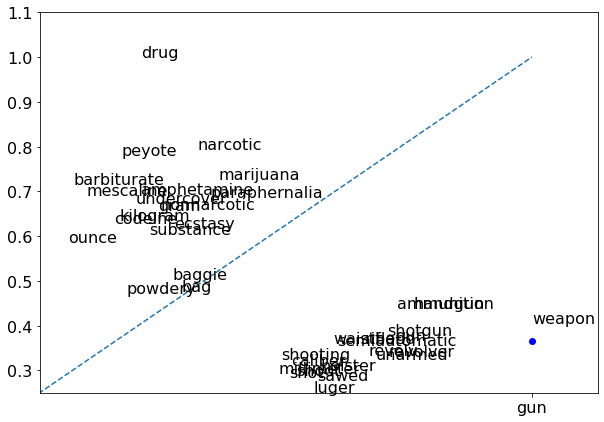

In [63]:
%matplotlib inline
_, ax = plt.subplots(figsize=(10,7))
ax.scatter(words, drug_score, alpha=1, color='b')
for i in range(len(words)):
    ax.annotate(words[i], (weapons_score[i], drug_score[i])).set_fontsize(16)
ax.set_xlim(.25, 1.1)
ax.set_ylim(.25, 1.1)
ax.yaxis.label.set_fontsize(16)
ax.xaxis.label.set_fontsize(16)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.savefig('plot.png')

### Classification of law cases

In [64]:
#Load data
with open("opinion_texts_notok.pkl", 'rb') as f:
     opinion_texts_notok = pickle.load(f)

In [65]:
financial = (opinion_texts_notok['Text'].str.contains("|".join(financial_crimes))) 
weapons = (opinion_texts_notok['Text'].str.contains("|".join(weapons_crimes))) 
drug = (opinion_texts_notok['Text'].str.contains("|".join(drug_crimes))) 
accident = (opinion_texts_notok['Text'].str.contains("|".join(car_accident))) 
burglary = (opinion_texts_notok['Text'].str.contains("|".join(burglary_case))) 
sexual = (opinion_texts_notok['Text'].str.contains("|".join(sexual_crimes)))
divorce = (opinion_texts_notok['Text'].str.contains("|".join(divorce_case)))
hospital = (opinion_texts_notok['Text'].str.contains("|".join(hospital_th)))

In [66]:
crimes = [financial, weapons, drug, accident, burglary, sexual, divorce, hospital]

In [67]:
# create a list of the values we want to assign for each condition
values = ['finance', 'weapons', 'drug', 'accident', 'burglary','sexual','divorce', 'hospital']

# create a new column and use np.select to assign values to it using our lists as arguments
opinion_texts_notok['crimes'] = np.select(crimes, values)

# display updated DataFrame
opinion_texts_notok.tail()

,Text,crimes
186365,armed robbery murder tried separately followin...,weapons
186366,brought damages sustained directed verdict evi...,finance
186367,murder armed robbery following armed robbery m...,weapons
186368,declaratory damages negotiate procure sought f...,sexual
186369,offense propriety allegedly noise engaged burg...,accident


In [68]:
accident = opinion_texts_notok.loc[opinion_texts_notok['crimes']=="accident"] #13514
finance= opinion_texts_notok.loc[opinion_texts_notok['crimes']=="finance"] #26529
weapons= opinion_texts_notok.loc[opinion_texts_notok['crimes']=="weapons"] #14596
burglary= opinion_texts_notok.loc[opinion_texts_notok['crimes']=="burglary"] #19675
drug= opinion_texts_notok.loc[opinion_texts_notok['crimes']=="drug"] #9537
sexual = opinion_texts_notok.loc[opinion_texts_notok['crimes']=="sexual"] #7375
divorce = opinion_texts_notok.loc[opinion_texts_notok['crimes']=="divorce"] #3817
hospital = opinion_texts_notok.loc[opinion_texts_notok['crimes']=="hospital"] #91327

#tot 171.774/197785 = 86%

In [69]:
with open("accident.pkl", "wb") as f:
    pickle.dump(accident, f)

In [70]:
with open("weapons.pkl", "wb") as f:
    pickle.dump(weapons, f)

In [71]:
with open("finance.pkl", "wb") as f:
    pickle.dump(finance, f)

In [72]:
with open("burglary.pkl", "wb") as f:
    pickle.dump(burglary, f)

In [73]:
with open("drug.pkl", "wb") as f:
    pickle.dump(drug, f)

In [74]:
with open("sexual.pkl", "wb") as f:
    pickle.dump(sexual, f)

In [75]:
with open("divorce.pkl", "wb") as f:
    pickle.dump(divorce, f)

In [76]:
with open("hospital.pkl", "wb") as f:
    pickle.dump(divorce, f)